# Business Case: Walmart - Confidence Interval and CLT

### Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1.) Defining Problem Statement and Analyzing basic metrics

### 1.1.1) Defining Problem Statement

### To analyze the sales and revenue data of Walmart stores and identify patterns, trends, and insights to help Walmart make data-driven decisions to optimize their business performance. Specifically, the analysis should aim to answer questions such as:

Which stores are performing well or poorly in terms of sales and revenue?

What are the top-selling products in each region?

What is the overall trend in sales and revenue over time?


Are there any opportunities for Walmart to increase sales and revenue by optimizing their pricing or marketing strategies?

By addressing these questions through data analysis, the goal is to provide actionable insights to Walmart that can help them make informed decisions to improve their business performance and profitability.








### 1.1.2) Analyzing basic metrics

In [3]:
df.shape

(550068, 10)

In [4]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# 1.2.) Non-Graphical Analysis: Value counts and unique attributes 

In [7]:
print(df['Gender'].value_counts())
print(df['Occupation'].value_counts())
print(df['City_Category'].unique())
print(df['Product_Category'].unique())

M    414259
F    135809
Name: Gender, dtype: int64
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
['A' 'C' 'B']
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


# 1.3.) Visual Analysis - Univariate & Bivariate

### 1.3.1) Univariate Analysis

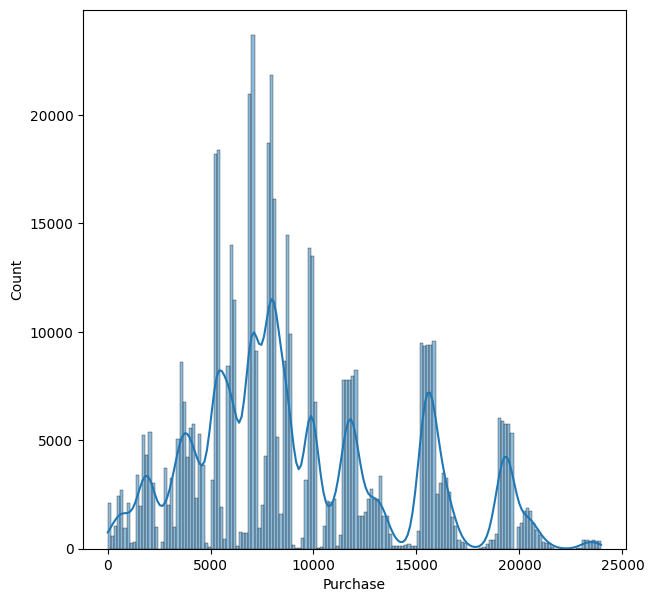

In [8]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

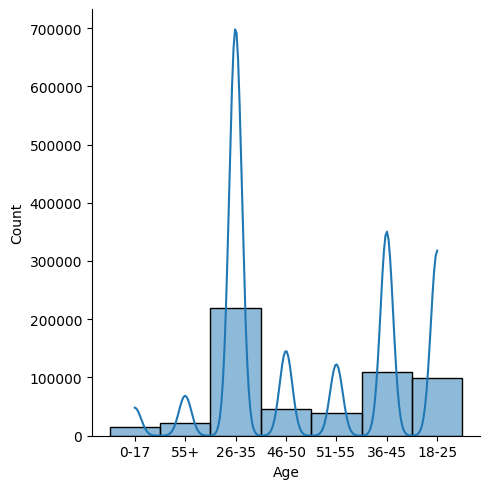

In [9]:
sns.displot(data=df,x='Age',kde=True)
plt.show()

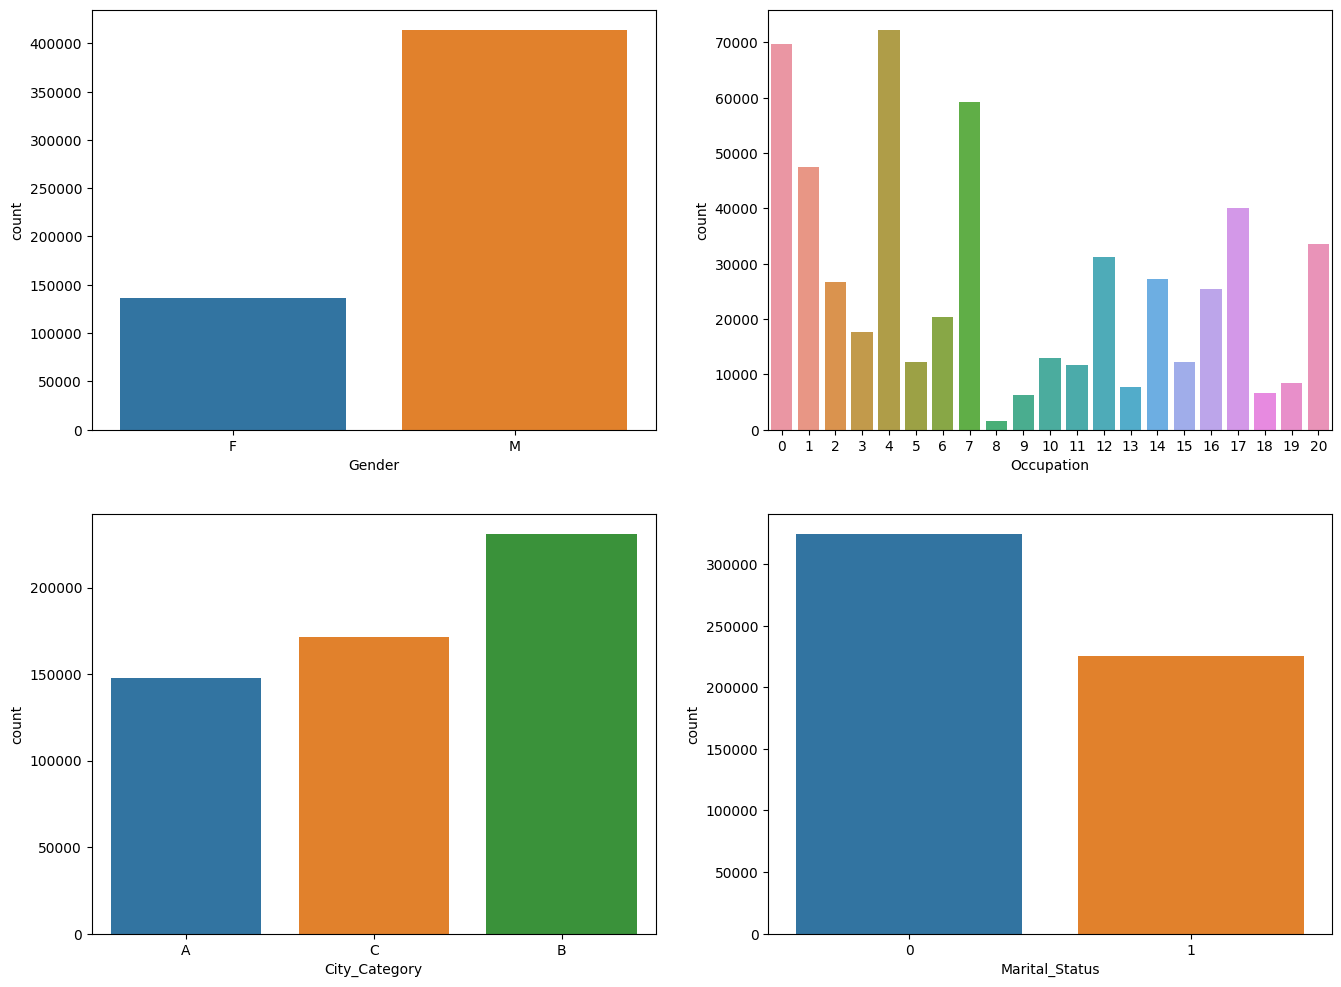

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

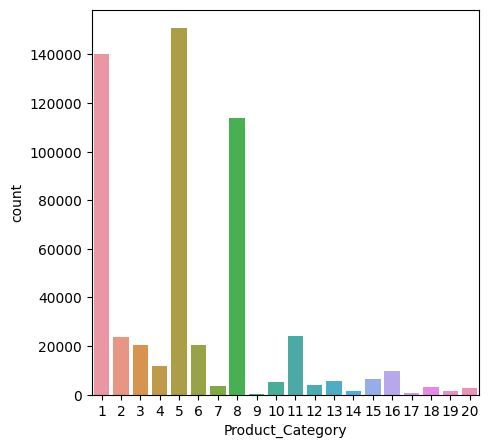

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Product_Category')
plt.show()

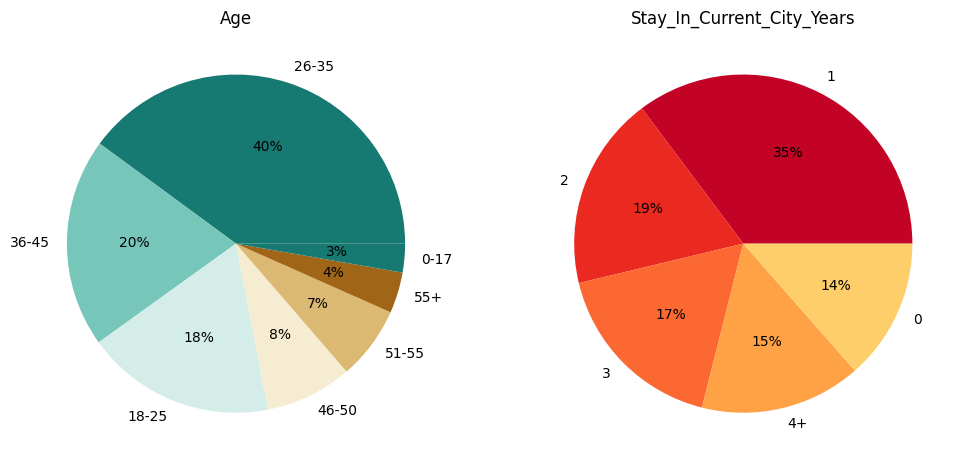

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

### 1.3.2) For categorical variable(s): Boxplot

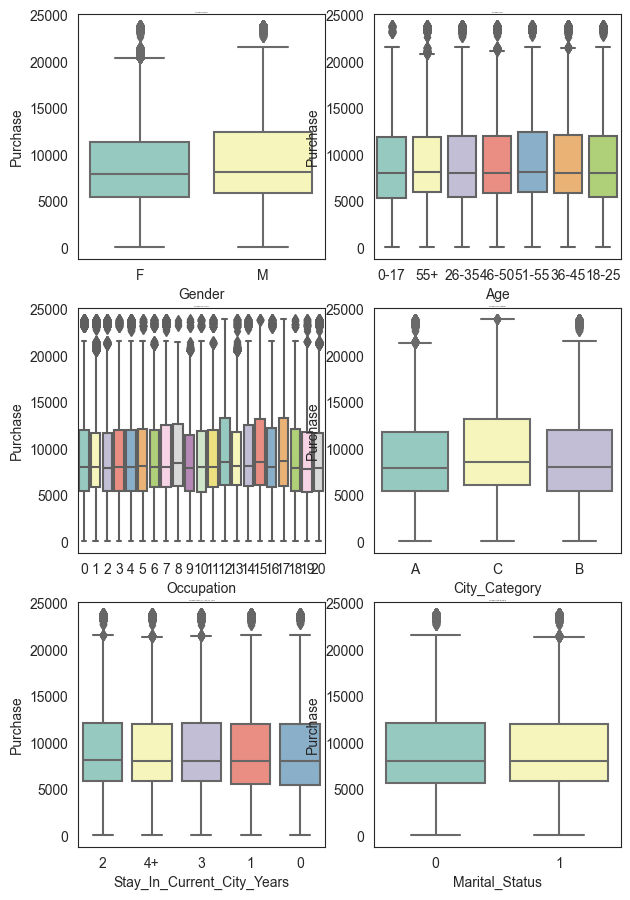

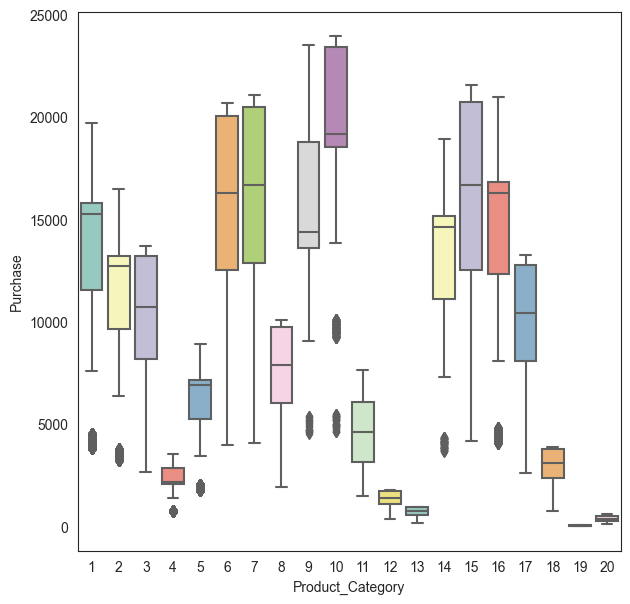

In [13]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,7))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=1, fontsize=1)
        count += 1
plt.show()

plt.figure(figsize=(7,7))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

### Boxplots for various columns are shown above which helps in identifying outliers in data

### Multivariate Analysis

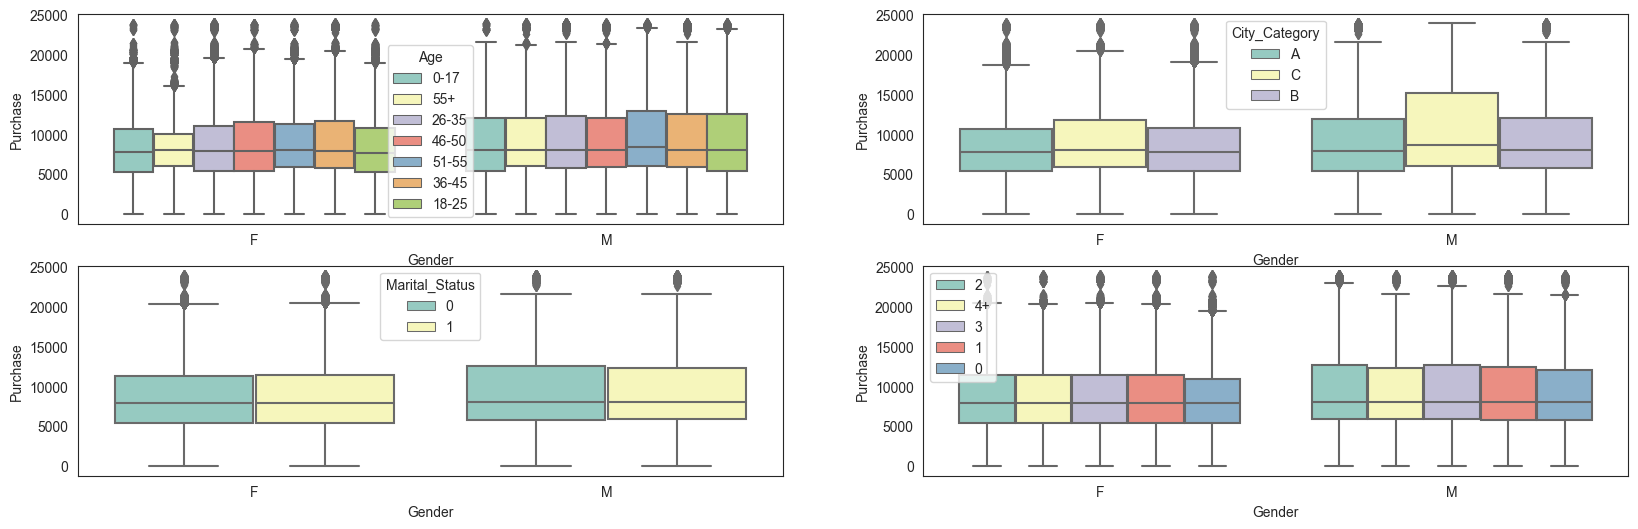

In [14]:
ig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

### 1.3.3) For correlation: Heatmaps, Pairplots

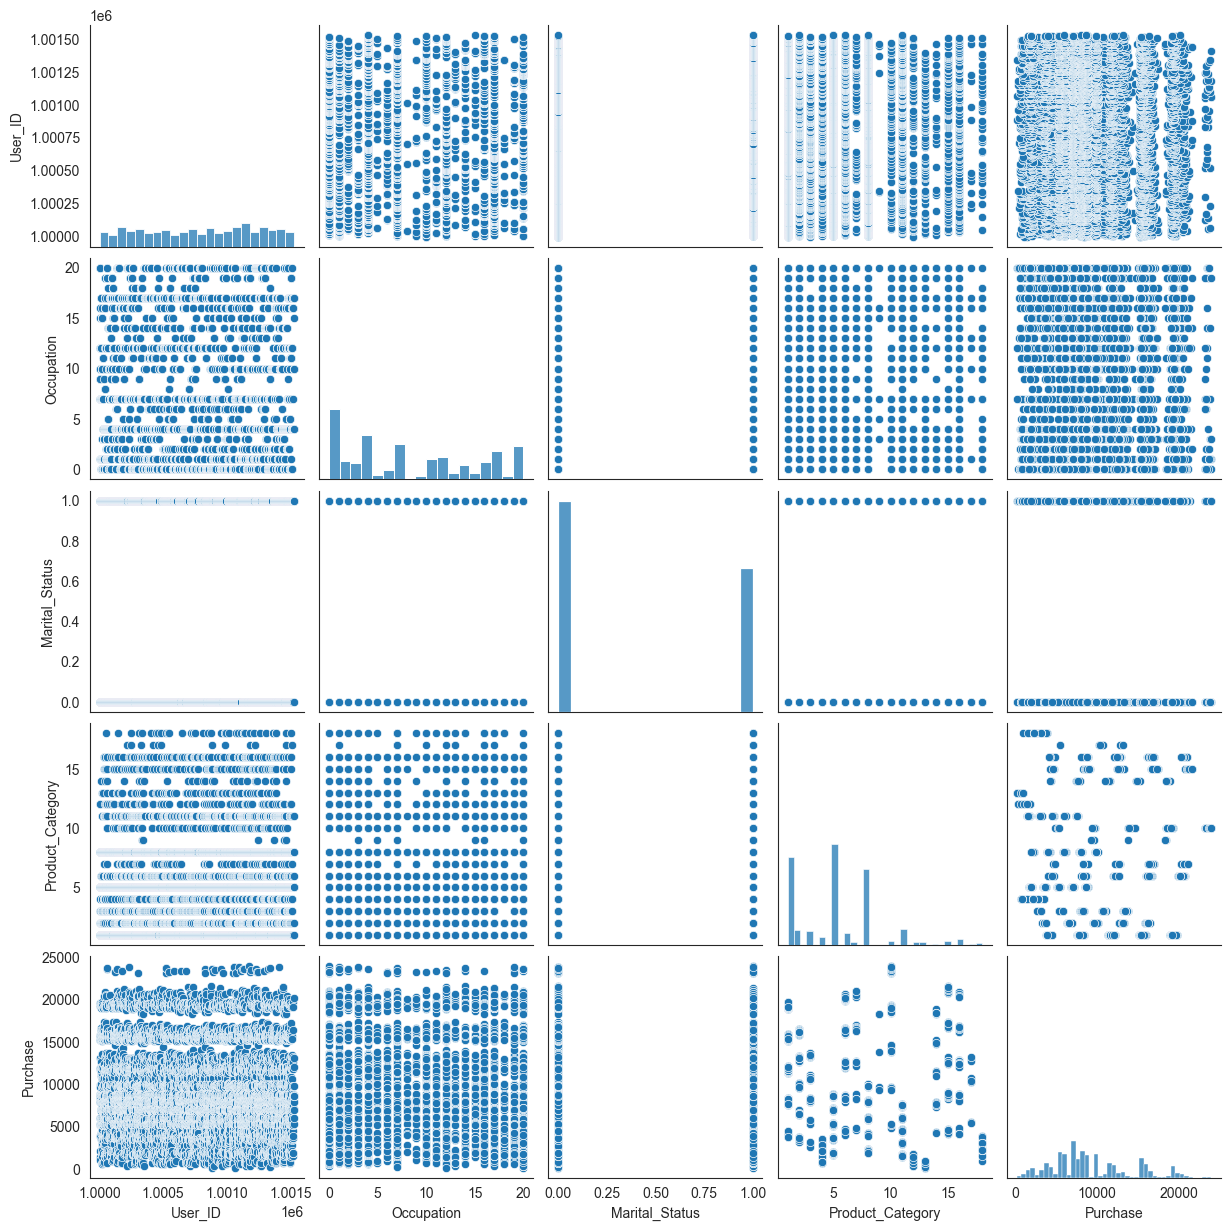

In [16]:
sns.pairplot(data=df.head(10000))
plt.show()

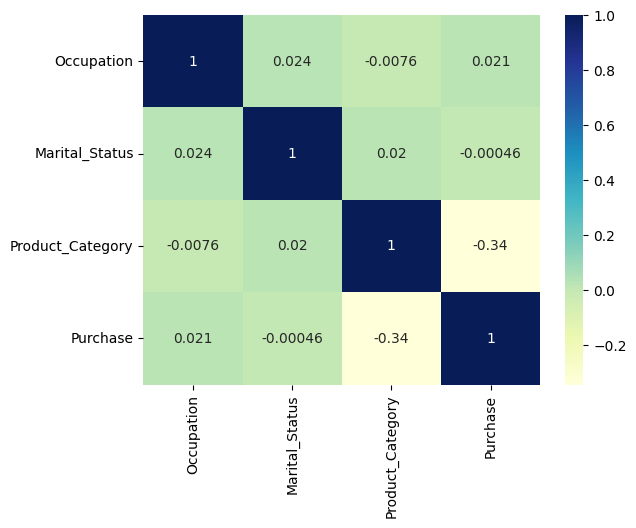

In [8]:
sns.heatmap(data=df[['Occupation','Marital_Status','Product_Category','Purchase']].corr(),cmap="YlGnBu",annot=True)
plt.show()

# 2.) Missing Value & Outlier Detection 

In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### The following are the observed outliers :-

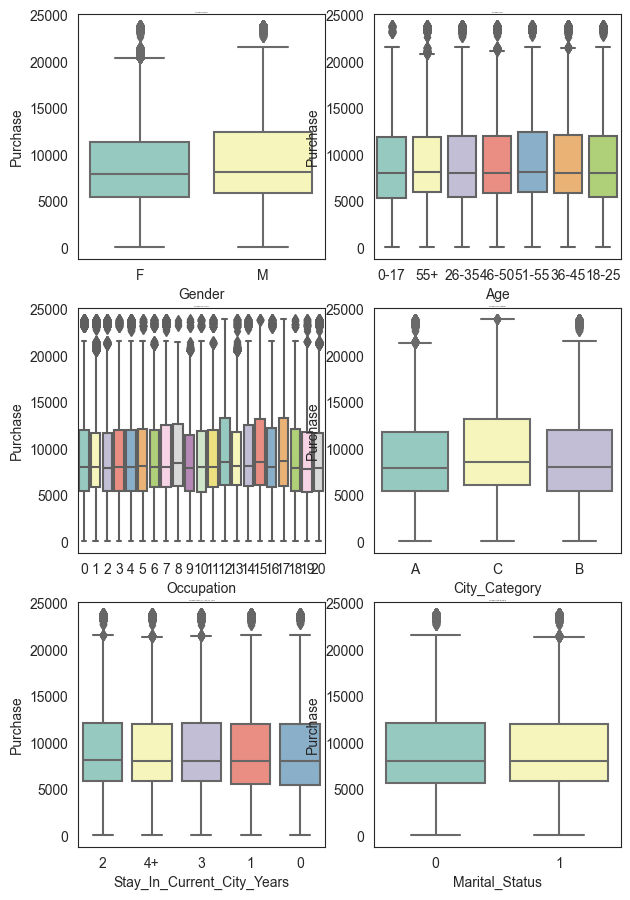

In [29]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,7))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=1, fontsize=1)
        count += 1
plt.show()

# 3.) Business Insights based on Non- Graphical and Visual Analysis

### 3.1) Range of attributes

In [24]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [25]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [26]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [27]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [28]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

### 3.2) Comments on the distribution of the variables and relationship between them
### &
### 3.3) Comments for each univariate and bivariate plot

#### 1.) There are more males than female in dataset
#### 2.) The most popular occupations are in order --> 4 > 0 > 7 > 1
#### 3.) Count of Top 3 City_categories is in order B > C > A
#### 4.) Product_Category Top 3 is in order 5 > 1 > 8
#### 5.) Largest age group is between age 26-35 i.e. 40%
#### 6.) Most no. of Stay_In_Current_City_Years is 1 i.e. 35%

# 4.1.) Are women spending more money per transaction than men? Why or Why not?

In [4]:
male_avg = round(df[df['Gender']=='M']['Purchase'].mean(),2)
female_avg = round(df[df['Gender']=='F']['Purchase'].mean(),2)

print(f"Average amount spent by Male customers: {male_avg}")
print(f"Average amount spent by Female customers: {female_avg}")

Average amount spent by Male customers: 9437.53
Average amount spent by Female customers: 8734.57


### Clearly from the above results we can see that Male customers are spending more money than Females

## 4.2) Confidence intervals and distribution of the mean of the expenses by female and male customers -- 95% confidence, 90% confidence , 99% confidence

In [3]:
male_customers=df[df['Gender']=='M']
female_customers=df[df['Gender']=='F']

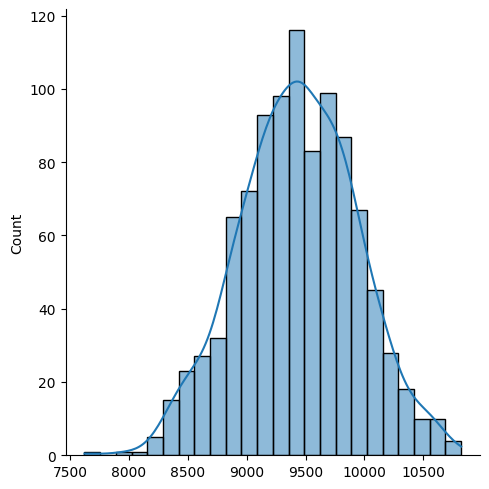

In [6]:
# Using Bootstrapping for males and plotting distribution curve

sample_male_mean=[]
for reps in range(1000):
    sample_male=np.random.choice(male_customers['Purchase'],size=100,replace=True)
    sample_mean=np.mean(sample_male)
    sample_male_mean.append(sample_mean)
sns.displot(sample_male_mean,kde=True)

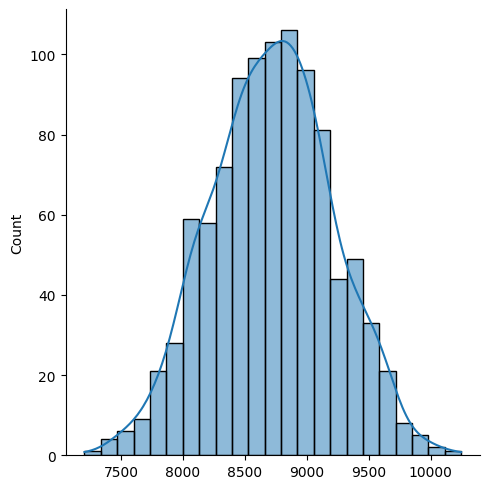

In [13]:
# Using Bootstrapping for females and plotting distribution curve

sample_female_mean=[]
for reps in range(1000):
    sample_female=np.random.choice(female_customers['Purchase'],size=100,replace=True)
    sample_mean_1=np.mean(sample_female)
    sample_female_mean.append(sample_mean_1)
sns.displot(sample_female_mean,kde=True)

In [9]:
# Confidence Interval for Males

x_bar=np.mean(sample_male_mean)
z=stats.norm.ppf(0.975)
se=z*(np.std(male_customers['Purchase'])/np.sqrt(len(sample_male_mean)))
ci_lower_male = x_bar - se
ci_upper_male = x_bar + se

print('Confidence Interval for Mens Purchase is ({:.2f},{:.2f})'.format(ci_lower_male,ci_upper_male))

Confidence Interval for Mens Purchase is (9120.09,9751.31)


In [11]:
# Confidence Interval for Females

x_bar=np.mean(sample_female_mean)
z=stats.norm.ppf(0.975)
se=z*(np.std(female_customers['Purchase'])/np.sqrt(len(sample_female_mean)))
ci_lower_female = x_bar - se
ci_upper_female = x_bar + se

print('Confidence Interval for Womens Purchase is ({:.2f},{:.2f})'.format(ci_lower_female,ci_upper_female))

Confidence Interval for Womens Purchase is (8451.70,9042.64)


## 4.3) Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

#### Clearly the Confidence interval of males and females do not overlap so Walmart  can use this information to identify potential opportunities for growth or improvement. For example, they may identify certain products or services that are more popular among one gender than the other and adjust their pricing or marketing strategies accordingly. They could also consider implementing targeted promotions or loyalty programs to appeal to specific customer groups.

## 4.4) Results when the same activity is performed for Married vs Unmarried 

In [12]:
unmarried_customers=df[df['Marital_Status']==0]
married_customers=df[df['Marital_Status']==1]

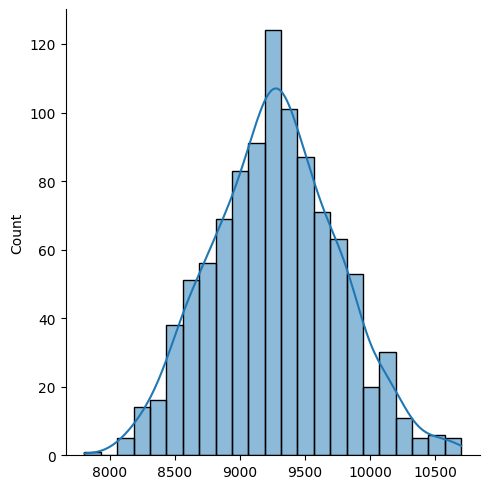

In [15]:
#  Using Bootstrapping for unmarried customers and plotting distribution curve

sample_mean_unmarried=[]
for reps in range(1000):
    sample_unmarried=np.random.choice(unmarried_customers['Purchase'],size=100,replace=True)
    sample_unmarried_mean=np.mean(sample_unmarried)
    sample_mean_unmarried.append(sample_unmarried_mean)
sns.displot(sample_mean_unmarried,kde=True)
plt.show()

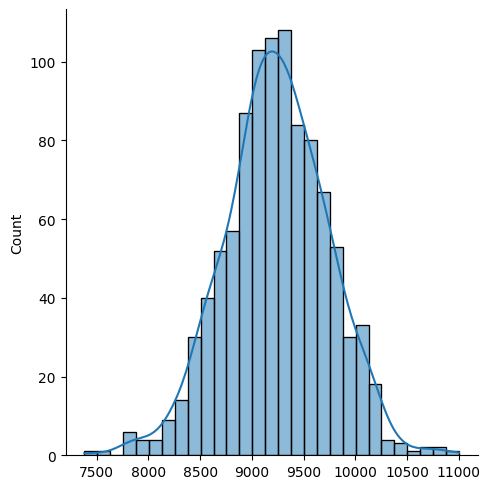

In [16]:
#  Using Bootstrapping for Married customers and plotting distribution curve

sample_mean_married=[]
for reps in range(1000):
    sample_married=np.random.choice(married_customers['Purchase'],size=100,replace=True)
    sample_married_mean=np.mean(sample_married)
    sample_mean_married.append(sample_married_mean)
sns.displot(sample_mean_married,kde=True)
plt.show()

In [17]:
# Confidence Interval for Unmarried customers

x_bar=np.mean(sample_mean_unmarried)
z=stats.norm.ppf(0.975)
se=z*(np.std(unmarried_customers['Purchase'])/np.sqrt(len(sample_mean_unmarried)))
ci_lower_unmarried = x_bar - se
ci_upper_unmarried = x_bar + se

print('Confidence Interval for Unmarried Customers Purchase is ({:.2f},{:.2f})'.format(ci_lower_unmarried,ci_upper_unmarried))

Confidence Interval for Unmarried Customers Purchase is (8959.38,9582.56)


In [18]:
# Confidence Interval for Married customers

x_bar=np.mean(sample_mean_married)
z=stats.norm.ppf(0.975)
se=z*(np.std(married_customers['Purchase'])/np.sqrt(len(sample_mean_married)))
ci_lower_married = x_bar - se
ci_upper_married = x_bar + se

print('Confidence Interval for Married Customers Purchase is ({:.2f},{:.2f})'.format(ci_lower_married,ci_upper_married))

Confidence Interval for Married Customers Purchase is (8926.69,9548.58)


## Overlapping for Married and Unmarried Confidence Interval

### There is overlapping between the two confidence interval

### Walmart can leverage this conclusion to make changes or improvements by ensuring that they are not discriminating against either Marital Status and that their pricing strategies and marketing efforts are equitable for both groups. They could also conduct further analysis to determine if there are any differences in purchasing patterns or preferences between married and unmarried customers and adjust their strategies accordingly.

## 4.5) Results when the same activity is performed for Age 

In [57]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [58]:
# Calculating for 95% confidence

for i in ['0-17','55+','26-35','46-50','51-55','36-45','18-25']:
    
    new_df = df[df['Age']==i]
    new_df_mean = np.mean(new_df['Purchase'])
    new_df_std = np.std(new_df['Purchase'])
    
    new_df_se = new_df_std/np.sqrt(len(new_df))
    ci_lower_limit = new_df_mean - 1.96*(new_df_se)
    ci_upper_limit = new_df_mean + 1.96*(new_df_se)
    
    print('For Age group {} the confidence interval is ({:.2f},{:.2f})'.format(i,ci_lower_limit,ci_upper_limit))

For Age group 0-17 the confidence interval is (8851.95,9014.98)
For Age group 55+ the confidence interval is (9269.30,9403.26)
For Age group 26-35 the confidence interval is (9231.73,9273.65)
For Age group 46-50 the confidence interval is (9163.08,9254.17)
For Age group 51-55 the confidence interval is (9483.99,9585.62)
For Age group 36-45 the confidence interval is (9301.67,9361.03)
For Age group 18-25 the confidence interval is (9138.41,9200.92)


In [59]:
# Calculating for 90% confidence

for i in ['0-17','55+','26-35','46-50','51-55','36-45','18-25']:
    
    new_df = df[df['Age']==i]
    new_df_mean = np.mean(new_df['Purchase'])
    new_df_std = np.std(new_df['Purchase'])
    
    new_df_se = new_df_std/np.sqrt(len(new_df))
    ci_lower_limit = new_df_mean - 1.645*(new_df_se)
    ci_upper_limit = new_df_mean + 1.645*(new_df_se)
    
    print('For Age group {} the confidence interval is ({:.2f},{:.2f})'.format(i,ci_lower_limit,ci_upper_limit))

For Age group 0-17 the confidence interval is (8865.05,9001.88)
For Age group 55+ the confidence interval is (9280.06,9392.50)
For Age group 26-35 the confidence interval is (9235.10,9270.28)
For Age group 46-50 the confidence interval is (9170.40,9246.85)
For Age group 51-55 the confidence interval is (9492.16,9577.46)
For Age group 36-45 the confidence interval is (9306.44,9356.26)
For Age group 18-25 the confidence interval is (9143.43,9195.90)


In [60]:
# Calculating for 99% confidence

for i in ['0-17','55+','26-35','46-50','51-55','36-45','18-25']:
    
    new_df = df[df['Age']==i]
    new_df_mean = np.mean(new_df['Purchase'])
    new_df_std = np.std(new_df['Purchase'])
    
    new_df_se = new_df_std/np.sqrt(len(new_df))
    ci_lower_limit = new_df_mean - 2.576*(new_df_se)
    ci_upper_limit = new_df_mean + 2.576*(new_df_se)
    
    print('For Age group {} the confidence interval is ({:.2f},{:.2f})'.format(i,ci_lower_limit,ci_upper_limit))

For Age group 0-17 the confidence interval is (8826.33,9040.60)
For Age group 55+ the confidence interval is (9248.25,9424.31)
For Age group 26-35 the confidence interval is (9225.15,9280.23)
For Age group 46-50 the confidence interval is (9148.77,9268.48)
For Age group 51-55 the confidence interval is (9468.02,9601.60)
For Age group 36-45 the confidence interval is (9292.34,9370.36)
For Age group 18-25 the confidence interval is (9128.58,9210.74)


# 5.) Final Insights

### 1.) There are more males than female in dataset
### 2.) The most popular occupations are in order --> 4 > 0 > 7 > 1
### 3.) Count of Top 3 City_categories is in order B > C > A
### 4.) Product_Category Top 3 is in order 5 > 1 > 8
### 5.) Largest age group is between age 26-35 i.e. 40%
### 6.) Most no. of Stay_In_Current_City_Years is 1 i.e. 35%
### 7.) Average amount spent by Male customers: 9437.53 & Average amount spent by Female customers: 8734.57
### 8.) Confidence Interval for Male Customer is CI : (9120.09,9751.31) for 95% confidence.
### 9.) Confidence Interval for Female Customer is CI : (8451.70,9042.64) for 95% confidence.
### 10.) Confidence Interval for Unmarried Customer is CI : (8959.38,9582.56) & Confidence Interval for Married Customer is CI : (8926.69,9548.58) for 95 % confidence.
### 11.) There is no overlapping in confidence intervals of Male and Female customers but there is overlapping in C.I. of Married and Unmarried Customers.
### 12.) Confidence Interval of Age Groups is given below for 95% confidence:-
#### For Age group 0-17 the confidence interval is (8851.95,9014.98)
#### For Age group 55+ the confidence interval is (9269.30,9403.26)
#### For Age group 26-35 the confidence interval is (9231.73,9273.65)
#### For Age group 46-50 the confidence interval is (9163.08,9254.17)
#### For Age group 51-55 the confidence interval is (9483.99,9585.62)
#### For Age group 36-45 the confidence interval is (9301.67,9361.03)
#### For Age group 18-25 the confidence interval is (9138.41,9200.92)




# 6.) Business Recommendations

### 1.) Target female customers: Although there are more male customers in the dataset, there is only a slight difference in the average amount spent by male and female customers. Therefore, targeting female customers could be a good strategy for increasing sales.

### 2.) Focus on the top 4 occupations: The most popular occupations in the dataset are 4, 0, 7, and 1. Therefore, it might be beneficial for the business to focus on these occupations while creating targeted marketing campaigns.

### 3.) Prioritize products in the top 3 categories: Since the top 3 product categories are 5, 1, and 8, the business should prioritize these categories while creating marketing strategies.

### 4.) Target customers in city category B: Since city category B has the highest count in the dataset, it might be beneficial to focus on customers in this category while creating marketing campaigns.

### 5.) Offer promotions for unmarried customers: The confidence intervals for married and unmarried customers overlap, but the business could still offer promotions specifically targeting unmarried customers to increase their sales.

### 6.) Develop products for age groups with wider confidence intervals: Age groups 0-17, 55+, and 51-55 have wider confidence intervals, indicating a larger range of potential spending amounts. Therefore, developing products that cater to these age groups could be beneficial for the business.

### 7.) Increase focus on customers aged 26-35: The largest age group in the dataset is customers aged 26-35. Therefore, it might be beneficial for the business to increase its focus on this age group while creating marketing strategies.

### 8.) The confidence intervals for married and unmarried customers overlap, indicating that there is no significant difference in the average amount spent by these groups. However, the confidence interval for unmarried customers is slightly higher than that of married customers. To increase sales to unmarried customers, the business could consider offering promotions and discounts that are targeted specifically to unmarried individuals. Additionally, the business could consider tailoring its product offerings to appeal to unmarried customers, such as offering more products that are geared towards individuals who live alone.

### 9.) The confidence interval for female customers is also relatively narrow, indicating that the average amount spent by female customers is consistent. However, the average amount spent by female customers is slightly lower than that of male customers. To increase sales to female customers, the business could consider offering promotions that are specifically tailored to women's interests and preferences.